**K nearest neighbour algorithm implementation using vanilla python**



In [174]:
import math
import matplotlib.pyplot as plt

In [175]:
sample_data = [(1,0),(3,0),(5,0),(8,0),(11,0),(100,1),(304,2),(25,0),(50,0),(67,0),(400,2),(170,1)]
# Each datapoint is a tuple : (data,label)
# There are 3 possible classes- 0,1,2

In [176]:
#Train-test split
train_data = sample_data[:7]
test_data = sample_data[7:]

In [177]:
def vector_subtract(v,w):
  return [v_i - w_i for v_i,w_i in zip(v,w) ]


In [178]:
#vector_subtract((100,1),(500,0))

In [179]:
def distance(labeled_datapoint,new_point):
  return abs(vector_subtract(labeled_datapoint,new_point)[0])


In [180]:
#print(distance((100,1),[500]))

In [181]:
def majority_vote(k_labels):
  """
  input: list of labels
  output: label with the most no.of occurences
  """
  label_count_dict = {}
  for label in k_labels:
    if label not in label_count_dict:
      label_count_dict[label] = 1
    else:
      label_count_dict[label] +=1
  max_label_count = 0
  for label in label_count_dict:
    max_label_count = max(label_count_dict[label],max_label_count)
  for label in k_labels:
    if label_count_dict[label] == max_label_count:
        max_label = label
  return max_label

In [182]:
#majority_vote([1,2,3,2,3,5,1,1,1,6,8,8,2,1,8,8,8,8,8,8,])

In [183]:
def knn_classify(k,labeled_points,new_point):
  """
  inputs: k, list of tuples(that contain labels), new point(tuple)
  output : predicted label of the newpoint
  """
  neighbor_sorted = sorted(labeled_points,key = lambda x: distance(x,new_point)) #
  #print(neighbor_sorted)
  k_neighbors = neighbor_sorted[:k]
  k_labels =[label for _,label in k_neighbors]
  #print(k_labels)
  return majority_vote(k_labels)


In [184]:
knn_classify(3,[(100,2),(35,1),(50,1),(350,2)],(400,1))

2

1 is the value of k and prediction error is :1.0
2 is the value of k and prediction error is :2.45
3 is the value of k and prediction error is :2.24
4 is the value of k and prediction error is :2.24
5 is the value of k and prediction error is :2.24
6 is the value of k and prediction error is :2.24
7 is the value of k and prediction error is :2.24
8 is the value of k and prediction error is :2.24
9 is the value of k and prediction error is :2.24
10 is the value of k and prediction error is :2.24
11 is the value of k and prediction error is :2.24
12 is the value of k and prediction error is :2.24
13 is the value of k and prediction error is :2.24
14 is the value of k and prediction error is :2.24
15 is the value of k and prediction error is :2.24
16 is the value of k and prediction error is :2.24
17 is the value of k and prediction error is :2.24
18 is the value of k and prediction error is :2.24
19 is the value of k and prediction error is :2.24
20 is the value of k and prediction error

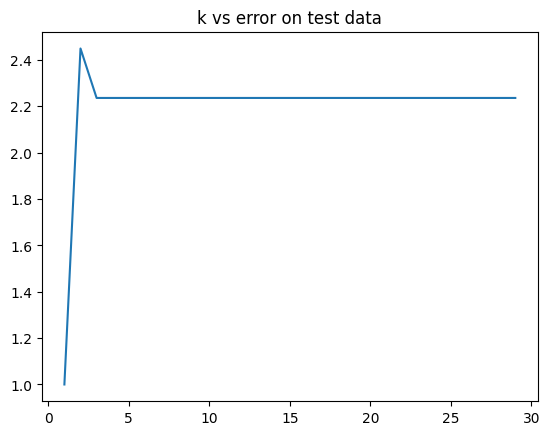

In [185]:
##Find the best k by predicting labels for the test dataset
errors = []
for k in range(1,30):
  train_data = sample_data[:6]
  sq_error, error=0,0
  for data in test_data:
    predicted_val = knn_classify(k,train_data,data)
    train_data.append(data)
    sq_error += (predicted_val - data[1])**2
  error=math.sqrt(sq_error)
  errors.append(error)
  print(f"{k} is the value of k and prediction error is :{round(error,2)}")

plt.plot([i for i in range(1,30)],errors)
plt.title("k vs error on test data")

plt.show()



In [186]:

# k's optimal value from the above simulation is 1

new_datapoint = (400,1)

In [187]:
knn_classify(1,train_data,new_datapoint) # predicted label of (400,1) is 2

2

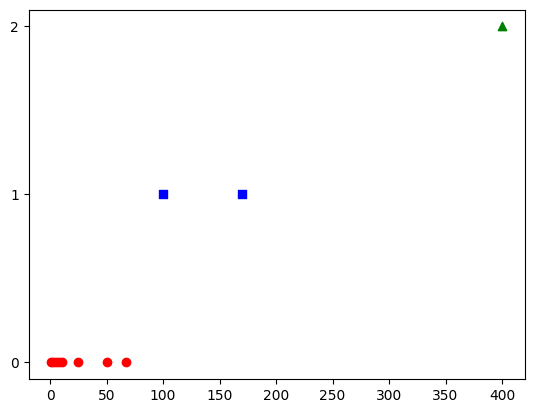

In [220]:

markers = { "0" : "o", "1" : "s", "2" : "^" }
colors  = { "0" : "r", "1" : "b", "2" : "g" }
plots = { "0" : [], "1" : [], "2" :[] }


for data in train_data:
    plots[str(data[1])].append(data[0])

for label, x in plots.items():
  for item in x:
    plt.scatter(item,label,color=colors[label], marker=markers[label],label=label,
                     zorder=10)
plt.show()
